Point velocity from ablation stake coordinates as measured during Rapid Static surveys

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import geopandas
import math

loc = '/home/pelto/Desktop/ice_flux/Conrad/'

f_in = 'conrad_stakes.csv'    #'conrad_points.csv' 

In [52]:
data = pd.read_csv(loc + f_in)
# data[0:10]
data

,survey_no,year,date,name,new_old,surv_name,E,N,Elev,B_dh,notes
0,0,2014,2014-09-04,CST1,new,CST1,504980.000,5630973.000,2001.0,NaN,NaN
1,0,2014,2014-09-04,CST2,new,CST2,505201.000,5630611.000,2101.0,NaN,NaN
2,0,2014,2014-09-04,CST3,new,CST3,505546.000,5629903.000,2200.0,NaN,NaN
3,0,2014,2014-09-05,CST4,new,CST4,505451.000,5629221.000,2309.0,NaN,NaN
4,1,2015,2015-07-16,NaN,NaN,CONK2,505177.500,5631146.000,1889.4,NaN,NaN
5,1,2015,2015-07-16,NaN,NaN,CONKJ,504922.800,5630804.000,2022.4,NaN,NaN
6,1,2015,2015-07-16,CST2,new,CONK3,505188.800,5630627.000,2077.3,NaN,NaN
7,1,2015,2015-07-16,NaN,NaN,CONKWX,505460.700,5630350.000,2125.8,NaN,NaN
8,1,2015,2015-07-16,NaN,NaN,CONKWX2,505544.500,5630157.000,2148.2,NaN,NaN
9,1,2015,2015-07-16,NaN,NaN,CONKIN,505215.900,5629867.000,2209.1,NaN,NaN


also need to calculate velocity (m/yr) and azimuth

In [89]:
# data.E = data.E.astype(float)
# data.dtypes
# data.date = date(data.date)
# data

In [90]:
# W=datetime.strptime(np.array(start_DATE)[0],'%Y-%m-%d')
# W.month
# diff_days

In [53]:
Dis=pd.DataFrame({})
for num in np.arange(1,7,1):  
    T=np.array(data[(data.survey_no==num)&((data.new_old=='old')|(data.new_old=='both'))].name) 
    for n in T:
        try:
            x=data[(data.survey_no==num-1) & (data.name==n) & ((data.new_old=='new')|
                                                               (data.new_old=='both'))].index[0] ##add in 'both'
        except:
            continue
        else:
            G=data[data.index==x]
#             if np.array(G.new_old=='new')[0]:
            eNEW=float(G.E)
            nNEW=float(G.N)

            eOLD=float(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|(data.new_old=='both'))].E.values[0])
            nOLD=float(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|
                                                               (data.new_old=='both'))].N.values[0])
            ElevOLD =float(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|(data.new_old=='both'))].Elev.values[0])
            ElevNEW =float(G.Elev)
            ##calculate stake displacement (meters) 
            distance = np.sqrt((eNEW - eOLD)**2 + (nNEW - nOLD)**2)
            dist_x = eOLD - eNEW  
            dist_y = nOLD - nNEW  

            ##calculate time (days) between surveys and then velocity (m/yr)
            start_DATE = (data[(data.name==n) & (data.survey_no==num-1)&((data.new_old=='new')|
                                                               (data.new_old=='both'))].date)
            end_DATE   = (data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|
                                                               (data.new_old=='both'))].date)
            S_DT=datetime.strptime(np.array(start_DATE)[0],'%Y-%m-%d')
            E_DT=datetime.strptime(np.array(end_DATE)[0],'%Y-%m-%d')

            diff_days  = (E_DT - S_DT).days 

            V = float((distance / diff_days) * 365.)

            u = float((dist_x / diff_days) * 365.) 
            v = float((dist_y / diff_days) * 365.) 

            ##calculate azimuth  
#           https://gis.stackexchange.com/questions/108547/how-to-calculate-distance-azimuth-and-dip-from-two-xyz-coordinates
            az = math.degrees(math.atan2((eOLD - eNEW), (nOLD - nNEW))) 

            Ele=float(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|
                                                               (data.new_old=='both'))].Elev.values[0])
            year=int(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|
                                                               (data.new_old=='both'))].year.values[0])
            DH=float(data[(data.name==n) & (data.survey_no==num)&((data.new_old=='old')|
                                                               (data.new_old=='both'))].B_dh.values[0])

            Dis=Dis.append({'Name':n,'eNew':(eNEW), 'nNew':(nNEW),'eOld':(eOLD),'nOld':(nOLD),
                                'Elev_Old':ElevOLD,'Elev_New':ElevNEW,'Year':year, 'Displacement':distance,'time_days':diff_days, 
                                'velocity':V, 'azimuth': az, 'u':u, 'v':v, 'B_dh':DH}, ignore_index=True)
                

In [54]:
pd.set_option('display.max_rows', None)
Dis

,B_dh,Displacement,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity
0,NaN,28.030162,2200.0,2181.7,CST3,2015.0,-2.658252,505546.0,505544.700,5629903.0,5629931.000,315.0,-1.506349,32.444444,32.479394
1,NaN,11.384639,2001.0,1973.2,CST1,2015.0,45.355870,504980.0,504988.100,5630973.0,5630981.000,315.0,9.385714,9.269841,13.191724
2,-7.06,1.220656,1880.5,1876.8,CST0,2015.0,34.992020,505139.8,505140.500,5631227.0,5631228.000,52.0,4.913462,7.019231,8.568063
3,-6.02,3.720215,2077.3,2073.4,CST2,2015.0,-36.253838,505188.8,505186.600,5630627.0,5630630.000,52.0,-15.442308,21.057692,26.113048
4,-4.41,5.314132,2177.8,2174.6,CST3,2015.0,-19.798876,505542.8,505541.000,5629937.0,5629942.000,52.0,-12.634615,35.096154,37.301120
5,NaN,11.605602,1967.8,1964.7,CST1,2016.0,18.591068,504991.1,504994.800,5630988.0,5630999.000,288.0,4.689236,13.940972,14.708489
6,NaN,5.381450,1877.0,1874.8,CST0,2016.0,41.987212,505142.6,505146.200,5631227.0,5631231.000,288.0,4.562500,5.069444,6.820240
7,NaN,25.663983,2174.8,2172.9,CST3,2016.0,-13.061551,505540.9,505535.100,5629941.0,5629966.000,288.0,-7.350694,31.684028,32.525533
8,-7.88,1.220656,1877.9,1871.1,CST0,2016.0,34.992020,505139.4,505140.100,5631225.0,5631226.000,70.0,3.650000,5.214286,6.364847
9,-4.95,3.080584,1964.7,1958.9,CST1,2016.0,13.134022,504994.8,504995.500,5630999.0,5631002.000,70.0,3.650000,15.642857,16.063047


In [55]:
from osgeo import ogr
import matplotlib.path as mpath
import matplotlib.patches as mpatches
# Extract first layer of features from shapefile using OGR
ds = ogr.Open('/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_17_extent.shp') #GIS/outlines/Conrad_2014.shp')
#ds = ogr.Open('/home/pelto/Desktop/lidar_cbt_analysis/zillmer/Zillmer/surrounding_glaciers_2014_zone10.shp')
nlay = ds.GetLayerCount()
lyr = ds.GetLayer(0)

#####################################################################################################################
paths = []
lyr.ResetReading()

# Read all features in layer and store as paths
for feat in lyr:
    geom = feat.geometry()
    codes = []
    all_x = []
    all_y = []
    for i in range(geom.GetGeometryCount()):
        # Read ring geometry and create path
        r = geom.GetGeometryRef(i)
        x = [r.GetX(j) for j in range(r.GetPointCount())]
        y = [r.GetY(j) for j in range(r.GetPointCount())]
        # skip boundary between individual rings
        codes += [mpath.Path.MOVETO] + \
                     (len(x)-1)*[mpath.Path.LINETO]
        all_x += x
        all_y += y
    path = mpath.Path(np.column_stack((all_x,all_y)), codes)
    paths.append(path)


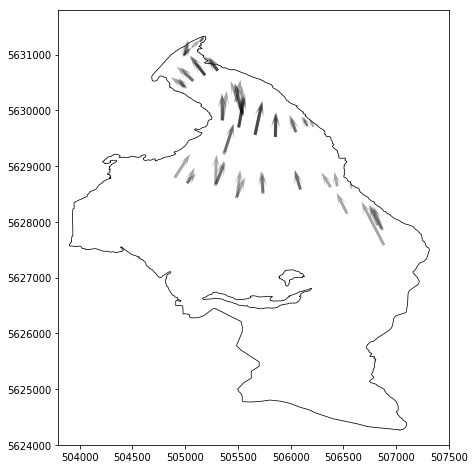

In [56]:
f, ax = plt.subplots(1, 1, figsize=(7,8))
ax.set_xlim(503800,507500)
ax.set_ylim(5624000,5631800)
patch = mpatches.PathPatch(path, facecolor='none', edgecolor='k', linewidth=0.75)
ax.add_patch(patch)
ax.quiver(Dis.eNew, Dis.nNew, Dis.u, Dis.v, color='k', alpha=0.35, headaxislength=2.5)


In [57]:
pd.set_option('display.max_columns', None)
Dis[Dis.Name=='CST2D']

,B_dh,Displacement,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity
13,-4.49,3.969887,2073.4,2068.4,CST2D,2016.0,-40.914383,505307.4,505304.800,5630711.0,5630714.000,70.0,-13.557143,15.642857,20.700123
26,-4.99,17.681629,2069.5,2061.8,CST2D,2017.0,-37.647621,505309.1,505298.300,5630711.0,5630725.000,375.0,-10.512000,13.626667,17.210119
52,-4.54,16.998648,2066.5,1984.8,CST2D,2018.0,-31.556273,505309.1,505300.204,5630711.0,5630725.485,351.0,-9.250826,15.062749,17.676657


In [58]:
Dis.to_csv(loc+'conrad_stake_velocity.csv')

In [59]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
from rasterio.features import rasterize
from rasterstats import zonal_stats
from sklearn.metrics import mean_squared_error as MSE
import pwlf
import math
from scipy import stats
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm
import statsmodels.formula.api as smf
from hydroeval import *

/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in less
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in less
/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in less


1.3797099191548279
1.862272046138064


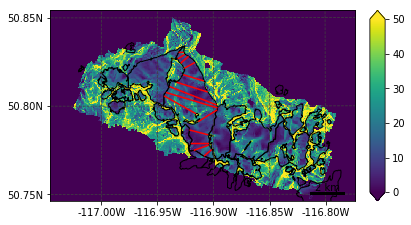

In [60]:
years =[2016,2017,2018]
yr=0
balance = 'Ba'  # Bw or Ba (winter or annual)
# rho_snow = 445. # 470 kg m-3 geodetic or 457 glaciological, or...take given years obs. value
year = years[yr] # any of: 2016, 2017, 2018
I = np.abs(year - 2016) # for selecting raster inputs

vcorr=False ## is velocity corrected by off ice bias and stake bias?

gl = 1 # number to select glacier
Glacier = ['Kokanee', 'Conrad', 'Illecillewaet']
glacier = ['kokanee', 'conrad', 'illecillewaet']
d = 20. #20.  #distance (m) between flux gate points
Dint = 0.9 #depth integrated velocity ratio, 1.0= all sliding
sVZ = 4.91  #velocity against stake measurements
sHopt = 0.1 #10.3 ## ME:10.3 m,  MAE:0.223 (percent ratio)
cb = 8 ##center bin use this to assure flux in is from bins cb+1 and cb+2

fl_path = '/home/pelto/Desktop/ice_flux/' + Glacier[gl] + '/'
gpr_path = '/home/pelto/GIS/GPR/ComparisonData/'
path = '/home/pelto/Desktop/lidar_cbt_analysis/' + glacier[gl] + '/'

VDIR = 'average'  # 'average' or 'individual'

if VDIR == 'individual':  

    ## DEMs
    vf_list = ['img1_20160417__img1_20160912_vmap_5.0m_35px_spm2/', 'img1_20160912__img1_20170521_vmap_5.0m_35px_spm2/',
           'img1_20170904__img2_20180822_vmap_10m_35px_spm2/'] #'img1_20170521__img2_20180426_vmap_10m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/

    ##planet labs
#         vf_list = ['xx', 'xx',
#                'img1_20170904__img2_20180822_vmap_10m_35px_spm2/']

    vdir = '/home/pelto/Desktop/velocity_mapping/' +Glacier[gl] + '_DEMs/spm2/3m/' + vf_list[I]
#         vdir = '/home/pelto/Desktop/velocity_mapping/conrad_planet/' + vf_list[I]
    VX = vdir+ vf_list[I][:-1] + '-F_vx.tif' 
    VY = vdir+ vf_list[I][:-1] + '-F_vy.tif' 
#     VX = vdir+ vf_list[I][:-15] + '25.0m_35px_spm2-F_vx.tif' 
#     VY = vdir+ vf_list[I][:-15] + '25.0m_35px_spm2-F_vy.tif' 
#     VM = vdir + vf_list[I][:-15] + '25.0m_35px_spm2-F_vy.tif' 

# # if VDIR == 'individual':  
#     vf_list = ['img1_20160417__img1_20170521_vmap_5.0m_35px_spm2/', 'img1_20160417__img1_20170521_vmap_5.0m_35px_spm2/',
#            'img1_20170521__img2_20180426_vmap_5.0m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/
#     vdir = '/home/pelto/Desktop/velocity_mapping/' +Glacier[gl] + '_DEMs/spm2/' + vf_list[I]
#     VX = vdir+ vf_list[I][:-1] + '-F_vx.tif' 
#     VY = vdir+ vf_list[I][:-1] + '-F_vy.tif' 
else:

    vdir = '/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/spm2/3m/'#bedem5_spm2/'  
    VX = vdir+ 'conrad_all_3mdems+planet_5m_vx.tif' #'conrad_fast_vy.tif'
    VY = vdir+ 'conrad_all_3mdems+planet_25m_vy.tif' #'conrad_all_dem3m_vy_new_blur3_5m.tif'
    VM = vdir + 'conrad_all_3mdems+planet_25m_vm.tif'
#     vdir = '/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/spm2/3m/'#bedem5_spm2/'  
#     VX = vdir+ 'conrad_all_vx_3mdems+planet_5m.tif' #'conrad_vx_spring_10m.tif' 
#     VY = vdir+ 'conrad_ALL_vy.tif' #'conrad_best_vy_3mdems+planet_5m_med.tif' #'conrad_vy_spring_10m.tif'
#     VM = vdir + 'conrad_all_vm_3mdems+planet_25m.tif'
## velocity_mapping/conrad_planet/img1_20170904__img2_20180822_vmap_10m_35px_spm2
#     topo_list = ['140911_conrad_update_dem1_clip.tif', '20160912_conrad_dem1_clip_slave.tif', '20170917_conrad_dem1_clip_slave.tif']
topo = path + '20160912_conrad_dem1_clip_slave.tif' #path + topo_list[I]
slope = '/home/pelto/GIS/DEM/Slope/ConradSlope160912_20m.tif'
farinotti = gpr_path + 'RGI60-02.02171_thickness.tif'

dhW_list = ['conrad_2016_winter_dh_dt14s.tif', 'conrad_2017_winter_dh_dt16s.tif', 'conrad_2018_winter_dh_dt.tif']
dhA_list = ['conrad_2015_2016_dh_dt_filled_1416+50cm.tif', 'conrad_2015_2016_dh_dt_filled_1416+50cm.tif', 'conrad_2016_2017_dh_dt.tif','conrad_2018_2017_dh_dt_60.tif']
if balance == 'Bw':
    dh_r = path+ dhW_list[I]   #winter height change TIFF
else:
    dh_r = path+  dhA_list[I] #Annual height change TIFF

pts_file = fl_path + 'conrad_points_gates_20m_wgs84.shp' #'conrad_points_17gates_C_20m_wgs84_b.shp'  ##must be WGS84 currently
gates = fl_path+'conrad_flux_gates.shp' #conrad_flux_gates_17_C
shpf = path + Glacier[gl] + '/conrad_all_glaciers_2014.shp'  #GLIMS_BC/glims_all/all_glaciers_2016.shp' 
bins=fl_path+glacier[gl]+'_bins'+'.shp' #_bins_2017_C

obs = pd.read_csv(fl_path+ 'Conrad_bdot.csv') 
rho = pd.read_csv(fl_path + 'conrad_rho_15bins.csv')  ## rho

# open GeoTIFF as array

vx = salem.open_xr_dataset(VX);vy = salem.open_xr_dataset(VY);vm = salem.open_xr_dataset(VM)
msk = salem.open_xr_dataset('/home/pelto/Desktop/lidar_cbt_analysis/conrad/conrad_total_msk.tif') 
# msk = salem.open_xr_dataset('/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/bedem5_spm2/conrad_2016_ice_msk_5m_glacieronly.tif') 
msk_conrad = salem.open_xr_dataset('/home/pelto/Desktop/lidar_cbt_analysis/conrad/conrad_2014_extent_5m.tif')

gpr = salem.open_xr_dataset(fl_path + 'gpr_outline_25_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
farin = salem.open_xr_dataset(farinotti)

H_opt = salem.open_xr_dataset(fl_path+'opt_thick_101sw_MAE_5m.tif') 
#     pts = salem.read_shapefile(fl_path+pts)
gates = salem.read_shapefile(gates)

vm = vm.to_array(name='vm')#vx = vx.to_array(name='vx');vy = vy.to_array(name='vy');

vx_reproj = vm.salem.transform(vx)
vx = vx_reproj.to_array(name='vx')
vy_reproj = vm.salem.transform(vy)
vy = vy_reproj.to_array(name='vy')

gpr_reproj = vm.salem.transform(gpr)
gpr = gpr_reproj.to_array(name='gpr')

msk_reproj = vm.salem.transform(msk)  #note succeeding trying to use gdalwarp to go from 2955 --> 32611
msk = msk_reproj.to_array(name='msk')
msk_conrad_reproj = vm.salem.transform(msk_conrad)
msk_conrad = msk_conrad_reproj.to_array(name='msk_conrad')
slope = salem.open_xr_dataset(slope); slope_reproj=vm.salem.transform(slope); slope=slope_reproj.to_array(name="slope")

H_opt_reproj = vm.salem.transform(H_opt)
H_opt = H_opt_reproj.to_array(name='H_opt')

farin_reproj= vm.salem.transform(farin)
farin = farin_reproj.to_array(name='farin')
srtm_corr = fl_path + 'conrad_SRTM_diff_30m.tif'
srtm_corr = salem.open_xr_dataset(srtm_corr)
srtm_corr = vm.salem.transform(srtm_corr)
srtm_corr = srtm_corr.to_array(name='srtm_corr')
srtm_corr.data[srtm_corr.data>10.0] = 0.0  ##remove positive anomalous values
srtm_corr.data[srtm_corr.data<-50.0] = 0.0 ##remove negative anomalous values
farin_corr = farin + srtm_corr
farin_corr= farin_corr.rename('farin_corr')

gpr.data[gpr.data<0] = np.nan
gpr.data[gpr.data<1.5] = 0.0   #not having any effect
VZ = np.sqrt(vx.data**2 + vy.data**2 )
# vx.data[msk.data==0] = np.nan
# vy.data[msk.data==0] = np.nan

VZ_off_ice = VZ.copy()
VZ_off_ice[msk.data>0.0] = np.nan
VZ[msk_conrad.data<0.0] = np.nan  ##################### I'm HERE ################
# VZ_off_ice[VZ_off_ice==0.0] = np.nan

dh = salem.open_xr_dataset(dh_r)
dh_reproj = vm.salem.transform(dh)
dh = dh_reproj.to_array(name='dh')
#     dh.data[dh.data<1] = np.nan

dem = salem.open_xr_dataset(topo)
dem_reproj = vm.salem.transform(dem)
dem = dem_reproj.to_array(name='dem')
dem.data[dem.data<1] = np.nan

#     # map extent
# grid = mercator_grid(center_ll=(-117.43, 51.238), extent=(4500, 4500)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
grid = vm.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
sm.set_data(slope) #, label='m')
sm.set_vmax(val=50.)
sm.set_vmin(val=0.)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
off_ice_V = np.nanmean(VZ_off_ice)
print(off_ice_V)
print(np.nanstd(VZ_off_ice))

gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()
# plt.savefig(fl_path+ 'products/'+ glacier[gl] +'_thickness_gates.png', dpi=300)
plt.show()


In [61]:
df = salem.read_shapefile(loc+'conrad_stake_velocity_wgs84_new.shp') 
# df_file = loadshp_as_gpd(pts_file)
#     df_file.crs

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['lon'] = coords[:, 0]; df['lat'] = coords[:, 1]

# ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);
xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
df['x'] = xx; df['y'] = yy

# shp_plt = reproject(df, VX)

X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
U = vx.data[0]
V = vy.data[0]

# Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
#     Q = ax.quiver(X[::20, ::20], Y[::20, ::20], U[::20, ::20], V[::20, ::20], units='xy')
#     ax.set_xlim(502500, 507500)
#     ax.set_ylim( 5625000, 5631500)
#     #     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
#     plt.savefig(fl_path+ 'products/'+ glacier[gl]+ str(year)+'_quiver.pdf', dpi=300)

# grid.ij_coordinates
# v_crs = check_crs(vx)

vns = ['vx','vy','gpr','H_opt','dem','farin_corr','dh','slope']

M = xr.merge([vx,vy,gpr,H_opt,dem,farin_corr,dh,slope]) #dem

for vn in vns:
    df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

# df_agg = df[['Displaceme', 'Elevation', 'Name', 'Year', 'eOld', 'nOld', 'velocity']].copy()
# ii, jj = grid.transform(df['eOld'], df['nOld'], crs=salem.wgs84, nearest=True)
# df_agg['i'] = ii; df_agg['j'] = jj
# # # We trick by creating an index of similar i's and j's
# # df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
# df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
# df_agg = df_agg.groupby('ij').mean()

# # Select
# for vn in vns:
# #     M_maksed = np.ma.masked_invalid(M[vn][0])
# #     df_agg[vn] = .interp(x=('z', df_agg.i), y=('z', df_agg.j))
#     df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))  

# D = df_agg[['ID', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'gpr', 'H_opt', 'dem', 'farin_corr']].copy()  
D=df
D['vz'] = np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 )

D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
# D.vzdir[D.vzdir>25.0]=np.nan  ##remove outliers for Kokanee only!!

###this step for Illec only!!
# D.vzdir[D.vzdir>0.0]=np.nan ## remove false velocity vectors which plague the accumulation zone 

#multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
# D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.))) #velocity normal to gate per slice


In [62]:
for i in range(len(D)):
    if D.time_days[i]<300:
        D.velocity[i]=D.velocity[i]*0.85
        

/home/pelto/anaconda2/envs/flux/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
D.loc[60, 'vz'] = 6.34 ## D.vz [D.index==59]  #6.34
D['diff'] = D.velocity - D.vz
D['VV'] =  (D.Elev_New-D.Elev_Old) -(D.velocity.values*np.tan(np.deg2rad(D.slope.values)))
#D['VV'] = D.B_dh.values + (D.velocity.values*np.tan(np.deg2rad(D.slope.values)))

In [64]:
# D['Alt_D']= D.Elev_New-D.Elev_Old

In [65]:
# D['ADV']=D.velocity.values*np.tan(np.deg2rad(D.slope.values))

In [66]:
D['VV_d']=D.dh-D.B_dh

In [67]:
D.to_csv(fl_path+'stake_vel_VV_15.csv')

In [68]:
pd.set_option('display.max_columns', None)
D
# D[D.Name=='CST2D']

,field_1,B_dh,Displaceme,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem,farin_corr,dh,slope,vz,vzdir,diff,VV,VV_d
0,0,NaN,28.030162,2200.0,2181.7,CST3,2015.0,-2.658252,505546.0,505544.700,5629903.0,5629931.000,315.0,-1.506349,32.444444,32.479394,POINT (-116.921265775134 50.82082308776694),-116.921266,-116.921266,50.820823,50.820823,-116.921266,50.820823,505546.0,5.629903e+06,-5.087409,33.181758,NaN,175.315747,2191.601161,137.609648,-2.451022,6.735520,33.569492,-8.716679,-1.090097,14.464133,NaN
1,1,NaN,11.384639,2001.0,1973.2,CST1,2015.0,45.355870,504980.0,504988.100,5630973.0,5630981.000,315.0,9.385714,9.269841,13.191724,POINT (-116.9292864980148 50.83045048989727),-116.929286,-116.929286,50.830450,50.830450,-116.929286,50.830450,504980.0,5.630973e+06,1.244294,11.753921,NaN,47.749821,1984.046757,65.637974,-4.036875,20.023160,11.819599,6.042943,1.372125,22.992565,NaN
2,2,-7.06,1.220656,1880.5,1876.8,CST0,2015.0,34.992020,505139.8,505140.500,5631227.0,5631228.000,52.0,4.913462,7.019231,7.282854,POINT (-116.9270138581387 50.83273325228266),-116.927014,-116.927014,50.832733,50.832733,-116.927014,50.832733,505139.8,5.631227e+06,0.341144,3.570948,NaN,20.844590,1883.557181,49.157866,-6.170867,19.557351,3.587206,5.457087,3.695647,1.112799,0.889133
3,3,-6.02,3.720215,2077.3,2073.4,CST2,2015.0,-36.253838,505188.8,505186.600,5630627.0,5630630.000,52.0,-15.442308,21.057692,22.196091,POINT (-116.9263265429522 50.82733716137713),-116.926327,-116.926327,50.827337,50.827337,-116.926327,50.827337,505188.8,5.630627e+06,-14.505308,15.617207,77.704726,81.561424,2085.443520,84.150242,-2.448713,10.465583,21.314341,-42.886025,0.881750,-0.200013,3.571287
4,4,-4.41,5.314132,2177.8,2174.6,CST3,2015.0,-19.798876,505542.8,505541.000,5629937.0,5629942.000,52.0,-12.634615,35.096154,31.705952,POINT (-116.9213106902668 50.82112887255992),-116.921311,-116.921311,50.821129,50.821129,-116.921311,50.821129,505542.8,5.629937e+06,-6.944307,31.623977,NaN,171.620425,2187.154348,140.212435,-2.234306,7.787371,32.377451,-12.385006,-0.671499,-1.136056,2.175694
5,5,NaN,11.605602,1967.8,1964.7,CST1,2016.0,18.591068,504991.1,504994.800,5630988.0,5630999.000,288.0,4.689236,13.940972,12.502215,POINT (-116.9291286794571 50.83058528561772),-116.929129,-116.929129,50.830585,50.830585,-116.929129,50.830585,504991.1,5.630988e+06,1.651967,10.718939,NaN,47.749821,1978.127677,70.847623,-3.957074,19.840374,10.845490,8.761301,1.656725,-1.411029,NaN
6,6,NaN,5.381450,1877.0,1874.8,CST0,2016.0,41.987212,505142.6,505146.200,5631227.0,5631231.000,288.0,4.562500,5.069444,5.797204,POINT (-116.9269740976383 50.83273322740784),-116.926974,-116.926974,50.832733,50.832733,-116.926974,50.832733,505142.6,5.631227e+06,0.294850,3.647870,NaN,20.803700,1882.997723,48.806517,-6.243033,19.925567,3.659767,4.621057,2.137437,0.098515,NaN
7,7,NaN,25.663983,2174.8,2172.9,CST3,2016.0,-13.061551,505540.9,505535.100,5629941.0,5629966.000,288.0,-7.350694,31.684028,27.646703,POINT (-116.9213376034796 50.82116486182237),-116.921338,-116.921338,50.821165,50.821165,-116.921338,50.821165,505540.9,5.629941e+06,-7.134077,31.349558,NaN,169.552083,2186.455416,140.171736,-2.309049,7.920869,32.151047,-12.820214,-4.504344,-1.946561,NaN
8,8,-7.88,1.220656,1877.9,1871.1,CST0,2016.0,34.992020,505139.4,505140.100,5631225.0,5631226.000,70.0,3.650000,5.214286,5.410120,POINT (-116.9270195662568 50.83271527033102),-116.927020,-116.927020,50.832715,50.832715,-116.927020,50.832715,505139.4,5.631225e+06,0.269753,3.592292,NaN,21.411803,1884.095295,49.188632,-6.193515,19.257223,3.602406,4.294410,1.807714,4.909936,1.686485
9,9,-4.95,3.080584,1964.7,1958.9,CST1,2016.0,13.134022,504994.8,504995.500,5630999.0,5631002.000,70.0,3.650000,15.642857,13.653590,POINT (-116.9290759913061 50.83068417401023),-116.929076,-116.929076,50.830684,50.830684,-116.929076,50.830684,504994.8,5.630999e+06,1.918005,9.461390,NaN,47.749821,1974.015802,69.931435,-3.9289

In [69]:
D_kok = pd.read_csv('/home/pelto/Desktop/ice_flux/Kokanee/'+'kokanee_vel_diff.csv')
D_kok

,Name,Elevation,eNew,nNew,velocity,Year,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem,farin_corr,vz,vzdir,diff
0,KST50,2364,490109,5511350,7.50,2018,POINT (-117.1373153612536 49.75454930782907),-117.137315,-117.137315,49.754549,49.754549,-117.137315,49.754549,490109.0,5.511350e+06,-0.305131,7.043019,36.516558,34.385391,2356.741749,20.376714,7.049626,-2.480724,0.450374
1,KST55,2309,490046,5511471,3.15,2018,POINT (-117.138193071263 49.75563659149316),-117.138193,-117.138193,49.755637,49.755637,-117.138193,49.755637,490046.0,5.511471e+06,-0.622951,4.963730,33.488136,35.442165,2316.306827,12.782419,5.002667,-7.153252,-1.852667
2,KST40,2509,490030,5510934,2.20,2016,POINT (-117.1384014558762 49.75080632699791),-117.138401,-117.138401,49.750806,49.750806,-117.138401,49.750806,490030.0,5.510934e+06,-1.788367,3.591122,48.576658,67.713249,2503.820273,49.908211,4.011784,-26.473151,-1.811784
3,KST45,2459,490111,5511145,6.00,2016,POINT (-117.1372823908123 49.75270548627849),-117.137282,-117.137282,49.752705,49.752705,-117.137282,49.752705,490111.0,5.511145e+06,-1.868223,7.092861,64.838698,68.384140,2453.718683,48.560032,7.334776,-14.756255,-1.334776
4,KST50,2364,490109,5511350,5.02,2016,POINT (-117.1373153612536 49.75454930782907),-117.137315,-117.137315,49.754549,49.754549,-117.137315,49.754549,490109.0,5.511350e+06,-0.305131,7.043019,36.516558,34.385391,2356.741749,20.376714,7.049626,-2.480724,-2.029626
5,KST55L,2333,490046,5511471,5.10,2016,POINT (-117.138193071263 49.75563659149316),-117.138193,-117.138193,49.755637,49.755637,-117.138193,49.755637,490046.0,5.511471e+06,-0.622951,4.963730,33.488136,35.442165,2316.306827,12.782419,5.002667,-7.153252,0.097333
6,KST25N,2630,489665,5510847,8.20,2019,POINT (-117.1434659850267 49.75001764946768),-117.143466,-117.143466,49.750018,49.750018,-117.143466,49.750018,489665.0,5.510847e+06,1.861041,9.827424,66.192421,49.660980,2638.838455,46.684468,10.002087,10.723247,-1.802087
7,KST35,2530,489923,5510888,5.83,2019,POINT (-117.1398856129503 49.75039080001076),-117.139886,-117.139886,49.750391,49.750391,-117.139886,49.750391,489923.0,5.510888e+06,-1.981172,2.636622,48.035900,46.954998,2551.677236,30.448810,3.298002,-36.921393,2.531998
8,KST40,2478,490030,5510934,4.25,2019,POINT (-117.1384014558762 49.75080632699791),-117.138401,-117.138401,49.750806,49.750806,-117.138401,49.750806,490030.0,5.510934e+06,-1.788367,3.591122,48.576658,67.713249,2503.820273,49.908211,4.011784,-26.473151,0.238216
9,KST45,2442,490111,5511145,5.50,2019,POINT (-117.1372823908123 49.75270548627849),-117.137282,-117.137282,49.752705,49.752705,-117.137282,49.752705,490111.0,5.511145e+06,-1.868223,7.092861,64.838698,68.384140,2453.718683,48.560032,7.334776,-14.756255,-1.834776


In [70]:
D_con= pd.DataFrame(D)
DD=pd.concat([D_con, D_kok], sort=False)# ignore_index=True)
DD

,field_1,B_dh,Displaceme,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem,farin_corr,dh,slope,vz,vzdir,diff,VV,VV_d,Elevation
0,0.0,NaN,28.030162,2200.0,2181.7,CST3,2015.0,-2.658252,505546.0,505544.700,5629903.0,5629931.000,315.0,-1.506349,32.444444,32.479394,POINT (-116.921265775134 50.82082308776694),-116.921266,-116.921266,50.820823,50.820823,-116.921266,50.820823,505546.0,5.629903e+06,-5.087409,33.181758,NaN,175.315747,2191.601161,137.609648,-2.451022,6.735520,33.569492,-8.716679,-1.090097,14.464133,NaN,NaN
1,1.0,NaN,11.384639,2001.0,1973.2,CST1,2015.0,45.355870,504980.0,504988.100,5630973.0,5630981.000,315.0,9.385714,9.269841,13.191724,POINT (-116.9292864980148 50.83045048989727),-116.929286,-116.929286,50.830450,50.830450,-116.929286,50.830450,504980.0,5.630973e+06,1.244294,11.753921,NaN,47.749821,1984.046757,65.637974,-4.036875,20.023160,11.819599,6.042943,1.372125,22.992565,NaN,NaN
2,2.0,-7.06,1.220656,1880.5,1876.8,CST0,2015.0,34.992020,505139.8,505140.500,5631227.0,5631228.000,52.0,4.913462,7.019231,7.282854,POINT (-116.9270138581387 50.83273325228266),-116.927014,-116.927014,50.832733,50.832733,-116.927014,50.832733,505139.8,5.631227e+06,0.341144,3.570948,NaN,20.844590,1883.557181,49.157866,-6.170867,19.557351,3.587206,5.457087,3.695647,1.112799,0.889133,NaN
3,3.0,-6.02,3.720215,2077.3,2073.4,CST2,2015.0,-36.253838,505188.8,505186.600,5630627.0,5630630.000,52.0,-15.442308,21.057692,22.196091,POINT (-116.9263265429522 50.82733716137713),-116.926327,-116.926327,50.827337,50.827337,-116.926327,50.827337,505188.8,5.630627e+06,-14.505308,15.617207,77.704726,81.561424,2085.443520,84.150242,-2.448713,10.465583,21.314341,-42.886025,0.881750,-0.200013,3.571287,NaN
4,4.0,-4.41,5.314132,2177.8,2174.6,CST3,2015.0,-19.798876,505542.8,505541.000,5629937.0,5629942.000,52.0,-12.634615,35.096154,31.705952,POINT (-116.9213106902668 50.82112887255992),-116.921311,-116.921311,50.821129,50.821129,-116.921311,50.821129,505542.8,5.629937e+06,-6.944307,31.623977,NaN,171.620425,2187.154348,140.212435,-2.234306,7.787371,32.377451,-12.385006,-0.671499,-1.136056,2.175694,NaN
5,5.0,NaN,11.605602,1967.8,1964.7,CST1,2016.0,18.591068,504991.1,504994.800,5630988.0,5630999.000,288.0,4.689236,13.940972,12.502215,POINT (-116.9291286794571 50.83058528561772),-116.929129,-116.929129,50.830585,50.830585,-116.929129,50.830585,504991.1,5.630988e+06,1.651967,10.718939,NaN,47.749821,1978.127677,70.847623,-3.957074,19.840374,10.845490,8.761301,1.656725,-1.411029,NaN,NaN
6,6.0,NaN,5.381450,1877.0,1874.8,CST0,2016.0,41.987212,505142.6,505146.200,5631227.0,5631231.000,288.0,4.562500,5.069444,5.797204,POINT (-116.9269740976383 50.83273322740784),-116.926974,-116.926974,50.832733,50.832733,-116.926974,50.832733,505142.6,5.631227e+06,0.294850,3.647870,NaN,20.803700,1882.997723,48.806517,-6.243033,19.925567,3.659767,4.621057,2.137437,0.098515,NaN,NaN
7,7.0,NaN,25.663983,2174.8,2172.9,CST3,2016.0,-13.061551,505540.9,505535.100,5629941.0,5629966.000,288.0,-7.350694,31.684028,27.646703,POINT (-116.9213376034796 50.82116486182237),-116.921338,-116.921338,50.821165,50.821165,-116.921338,50.821165,505540.9,5.629941e+06,-7.134077,31.349558,NaN,169.552083,2186.455416,140.171736,-2.309049,7.920869,32.151047,-12.820214,-4.504344,-1.946561,NaN,NaN
8,8.0,-7.88,1.220656,1877.9,1871.1,CST0,2016.0,34.992020,505139.4,505140.100,5631225.0,5631226.000,70.0,3.650000,5.214286,5.410120,POINT (-116.9270195662568 50.83271527033102),-116.927020,-116.927020,50.832715,50.832715,-116.927020,50.832715,505139.4,5.631225e+06,0.269753,3.592292,NaN,21.411803,1884.095295,49.188632,-6.193515,19.257223,3.602406,4.294410,1.807714,4.909936,1.686485,NaN
9,9.0,-4.95,3.080584,1964.7,1958.9,CST1,2016.0,13.134022,504994.8,504995.500,5630999.0,5631002.000,70.0,3.650000,15.642857,13.653590,POINT (-116.9290759913061 50.83068417401023),-116.929076,-116.929076,50.830684,50.830684,-116.929076,50.830684,504994.8,5.630999

In [71]:
print('For Conrad there is a mean difference of:', round(np.nanmean(D['diff']),2), ' m between stake and estimated velocity at', 
      len(D), 'stakes', 'with a SE of:', round(stats.sem(D['diff']),2), 'and a SD of:', round(np.std(D['diff']),2)) 

For Conrad there is a mean difference of: 3.09  m between stake and estimated velocity at 63 stakes with a SE of: 0.83 and a SD of: 6.51


In [72]:
print('For Conrad and Kokanee there is a mean difference of:', round(np.nanmean(DD['diff']),2), ' m between stake and estimated velocity at', 
      len(DD), 'stakes', 'with a SE of:', round(stats.sem(DD['diff']),2), 'and a SD of:', round(np.std(DD['diff']),2)) 

For Conrad and Kokanee there is a mean difference of: 2.52  m between stake and estimated velocity at 74 stakes with a SE of: 0.72 and a SD of: 6.18


In [73]:
D.sort_values(by='diff', ascending=False)

,field_1,B_dh,Displaceme,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem,farin_corr,dh,slope,vz,vzdir,diff,VV,VV_d
36,36,-1.41,28.429738,2387.5,2376.5,CST5B,2017.0,23.860175,505283.6,505295.100,5628648.0,5628674.000,376.0,11.163564,25.239362,27.598017,POINT (-116.9250090288521 50.80953960449732),-116.925009,-116.925009,50.809540,50.809540,-116.925009,50.809540,505283.6,5.628648e+06,-0.425931,8.238924,NaN,146.462062,2399.811845,132.848331,1.600408,16.369180,8.249927,-2.959405,19.348090,2.893591,3.010408
20,20,NaN,6.003332,2379.2,2376.9,CST5B,2016.0,1.909152,505287.3,505287.500,5628681.0,5628687.000,70.0,1.042857,31.285714,26.607627,POINT (-116.9249560387519 50.80983633271422),-116.924956,-116.924956,50.809836,50.809836,-116.924956,50.809836,505287.3,5.628681e+06,0.117705,7.271181,NaN,146.150284,2390.791176,125.602621,-0.715785,18.989442,7.272134,0.927416,19.335493,-6.856257,NaN
56,56,-0.33,25.727765,2376.5,2366.7,CST5B,2018.0,18.599741,505295.1,505303.306,5628674.0,5628698.384,350.0,8.557686,25.429029,26.830384,POINT (-116.9248454325227 50.80977331194633),-116.924845,-116.924845,50.809773,50.809773,-116.924845,50.809773,505295.1,5.628674e+06,0.145392,7.677267,NaN,146.150284,2391.093699,126.592700,-0.655098,19.176633,7.678644,1.084939,19.151740,0.468940,-0.325098
52,52,-4.54,16.998648,2066.5,1984.8,CST2D,2018.0,-31.556273,505309.1,505300.204,5630711.0,5630725.485,351.0,-9.250826,15.062749,17.676657,POINT (-116.9246172419592 50.82809146224122),-116.924617,-116.924617,50.828091,50.828091,-116.924617,50.828091,505309.1,5.630711e+06,-0.324747,2.245465,51.902721,79.367897,2082.914077,44.633580,-2.977748,11.977276,2.268827,-8.229268,15.407830,77.950037,1.562252
13,13,-4.49,3.969887,2073.4,2068.4,CST2D,2016.0,-40.914383,505307.4,505304.800,5630711.0,5630714.000,70.0,-13.557143,15.642857,17.595105,POINT (-116.9246413798677 50.82809147783194),-116.924641,-116.924641,50.828091,50.828091,-116.924641,50.828091,505307.4,5.630711e+06,-0.316775,2.200404,52.524114,79.367897,2082.701864,44.826468,-2.991564,12.008306,2.223089,-8.192143,15.372016,1.257379,1.498436
26,26,-4.99,17.681629,2069.5,2061.8,CST2D,2017.0,-37.647621,505309.1,505298.300,5630711.0,5630725.000,375.0,-10.512000,13.626667,17.210119,POINT (-116.9246172419592 50.82809146224122),-116.924617,-116.924617,50.828091,50.828091,-116.924617,50.828091,505309.1,5.630711e+06,-0.324747,2.245465,51.902721,79.367897,2082.914077,44.633580,-2.977748,11.977276,2.268827,-8.229268,14.941292,4.049010,2.012252
35,35,-0.82,31.009837,2381.2,2372.4,CST5A,2017.0,33.023868,504901.3,504918.200,5628790.0,5628816.000,376.0,16.405585,25.239362,30.102634,POINT (-116.9304331722094 50.81081994167693),-116.930433,-116.930433,50.810820,50.810820,-116.930433,50.810820,504901.3,5.628790e+06,6.231169,15.137378,NaN,96.055031,2399.480159,77.186949,-1.522545,19.076004,16.369718,22.374087,13.732916,-1.609855,-0.702545
31,31,-3.76,27.000000,2201.9,2195.0,CST3D,2017.0,0.000000,505856.1,505856.100,5629522.0,5629549.000,375.0,0.000000,26.280000,26.280000,POINT (-116.9168695041702 50.81739378843756),-116.916870,-116.916870,50.817394,50.817394,-116.916870,50.817394,505856.1,5.629522e+06,-3.173608,12.644476,NaN,147.402719,2215.496447,106.500590,-1.765592,14.491025,13.036662,-14.089493,13.243338,0.107921,1.994408
47,47,-3.06,24.422169,2199.7,2193.4,CST3D,2018.0,0.560716,505853.1,505853.339,5629523.0,5629547.421,351.0,0.248533,25.395057,25.396273,POINT (-116.9169120747826 50.8174028115445),-116.916912,-116.916912,50.817403,50.817403,-116.916912,50.817403,505853.1,5.629523e+06,-2.951600,12.843555,NaN,148.193465,2215.434335,107.292763,-1.740659,14.211895,13.178347,-12.942521,12.217926,-0.131855,1.319341
34,34,-2.46,34.881084,2290.5,2284.8,CST4,2017.0,18.902447,505363.9,505375.200,5629209.0,5629242.000,376.0,10.969415,32.034574,33.860626,POINT (-116.9238611182333 50.81458381789815),-116.923861,-116.923861,50.814584,50.814584,-116.923861,50

In [74]:
# B=D[D.index==59]  #6.34
# B

In [75]:
# DD

In [76]:
DD

,field_1,B_dh,Displaceme,Elev_New,Elev_Old,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem,farin_corr,dh,slope,vz,vzdir,diff,VV,VV_d,Elevation
0,0.0,NaN,28.030162,2200.0,2181.7,CST3,2015.0,-2.658252,505546.0,505544.700,5629903.0,5629931.000,315.0,-1.506349,32.444444,32.479394,POINT (-116.921265775134 50.82082308776694),-116.921266,-116.921266,50.820823,50.820823,-116.921266,50.820823,505546.0,5.629903e+06,-5.087409,33.181758,NaN,175.315747,2191.601161,137.609648,-2.451022,6.735520,33.569492,-8.716679,-1.090097,14.464133,NaN,NaN
1,1.0,NaN,11.384639,2001.0,1973.2,CST1,2015.0,45.355870,504980.0,504988.100,5630973.0,5630981.000,315.0,9.385714,9.269841,13.191724,POINT (-116.9292864980148 50.83045048989727),-116.929286,-116.929286,50.830450,50.830450,-116.929286,50.830450,504980.0,5.630973e+06,1.244294,11.753921,NaN,47.749821,1984.046757,65.637974,-4.036875,20.023160,11.819599,6.042943,1.372125,22.992565,NaN,NaN
2,2.0,-7.06,1.220656,1880.5,1876.8,CST0,2015.0,34.992020,505139.8,505140.500,5631227.0,5631228.000,52.0,4.913462,7.019231,7.282854,POINT (-116.9270138581387 50.83273325228266),-116.927014,-116.927014,50.832733,50.832733,-116.927014,50.832733,505139.8,5.631227e+06,0.341144,3.570948,NaN,20.844590,1883.557181,49.157866,-6.170867,19.557351,3.587206,5.457087,3.695647,1.112799,0.889133,NaN
3,3.0,-6.02,3.720215,2077.3,2073.4,CST2,2015.0,-36.253838,505188.8,505186.600,5630627.0,5630630.000,52.0,-15.442308,21.057692,22.196091,POINT (-116.9263265429522 50.82733716137713),-116.926327,-116.926327,50.827337,50.827337,-116.926327,50.827337,505188.8,5.630627e+06,-14.505308,15.617207,77.704726,81.561424,2085.443520,84.150242,-2.448713,10.465583,21.314341,-42.886025,0.881750,-0.200013,3.571287,NaN
4,4.0,-4.41,5.314132,2177.8,2174.6,CST3,2015.0,-19.798876,505542.8,505541.000,5629937.0,5629942.000,52.0,-12.634615,35.096154,31.705952,POINT (-116.9213106902668 50.82112887255992),-116.921311,-116.921311,50.821129,50.821129,-116.921311,50.821129,505542.8,5.629937e+06,-6.944307,31.623977,NaN,171.620425,2187.154348,140.212435,-2.234306,7.787371,32.377451,-12.385006,-0.671499,-1.136056,2.175694,NaN
5,5.0,NaN,11.605602,1967.8,1964.7,CST1,2016.0,18.591068,504991.1,504994.800,5630988.0,5630999.000,288.0,4.689236,13.940972,12.502215,POINT (-116.9291286794571 50.83058528561772),-116.929129,-116.929129,50.830585,50.830585,-116.929129,50.830585,504991.1,5.630988e+06,1.651967,10.718939,NaN,47.749821,1978.127677,70.847623,-3.957074,19.840374,10.845490,8.761301,1.656725,-1.411029,NaN,NaN
6,6.0,NaN,5.381450,1877.0,1874.8,CST0,2016.0,41.987212,505142.6,505146.200,5631227.0,5631231.000,288.0,4.562500,5.069444,5.797204,POINT (-116.9269740976383 50.83273322740784),-116.926974,-116.926974,50.832733,50.832733,-116.926974,50.832733,505142.6,5.631227e+06,0.294850,3.647870,NaN,20.803700,1882.997723,48.806517,-6.243033,19.925567,3.659767,4.621057,2.137437,0.098515,NaN,NaN
7,7.0,NaN,25.663983,2174.8,2172.9,CST3,2016.0,-13.061551,505540.9,505535.100,5629941.0,5629966.000,288.0,-7.350694,31.684028,27.646703,POINT (-116.9213376034796 50.82116486182237),-116.921338,-116.921338,50.821165,50.821165,-116.921338,50.821165,505540.9,5.629941e+06,-7.134077,31.349558,NaN,169.552083,2186.455416,140.171736,-2.309049,7.920869,32.151047,-12.820214,-4.504344,-1.946561,NaN,NaN
8,8.0,-7.88,1.220656,1877.9,1871.1,CST0,2016.0,34.992020,505139.4,505140.100,5631225.0,5631226.000,70.0,3.650000,5.214286,5.410120,POINT (-116.9270195662568 50.83271527033102),-116.927020,-116.927020,50.832715,50.832715,-116.927020,50.832715,505139.4,5.631225e+06,0.269753,3.592292,NaN,21.411803,1884.095295,49.188632,-6.193515,19.257223,3.602406,4.294410,1.807714,4.909936,1.686485,NaN
9,9.0,-4.95,3.080584,1964.7,1958.9,CST1,2016.0,13.134022,504994.8,504995.500,5630999.0,5631002.000,70.0,3.650000,15.642857,13.653590,POINT (-116.9290759913061 50.83068417401023),-116.929076,-116.929076,50.830684,50.830684,-116.929076,50.830684,504994.8,5.630999

In [77]:
DD.Year = df.Year.astype(int)

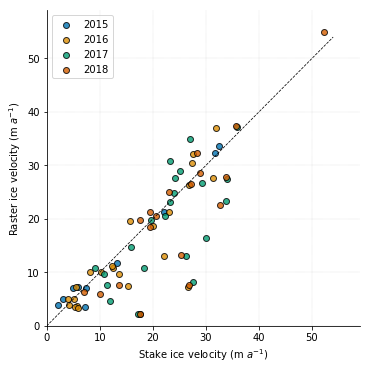

In [78]:
import seaborn as sns
# for name in glacier:
#     V=dt[dt.glacier==name]
#     print
# for i in D.Year:
#     D.Year[i]=int(D.Year[i])


# plt.figure(figsize=(4,4))#(3.34,3.34))

# plt.plot(np.arange(0, 290), np.arange(0, 290), 'k--', linewidth=0.5, zorder=1)

# Use the 'hue' argument to provide a factor variable
g= sns.lmplot( x="velocity", y="vz", data=DD, fit_reg=False, hue='Year', legend=False, palette='colorblind',scatter_kws={'linewidths':1,'edgecolor':'k'})
# plt.scatter(D.velocity, D.vz, s=30, edgecolor='#3182bd', facecolor='#a6bddb', linewidth=1.4, label=D.Year)#, zorder=3)
plt.plot(np.arange(0, 55), np.arange(0, 55), 'k--', linewidth=0.75, zorder=1)
plt.xlabel('Stake ice velocity (m $a^{-1}$)')
plt.ylabel('Raster ice velocity (m $a^{-1}$)')
plt.xlim(0,59);plt.ylim(0,59)
plt.legend(loc=2)
plt.grid(linestyle=':', linewidth=0.4, color='gray', alpha=0.5, zorder=0)
plt.tight_layout(pad=0.2)
plt.savefig(loc+ 'products/Conrad_Kokanee_stake_vel_comp25m_0.9_ALLy_new.png',dpi=300)
plt.show()



In [50]:
def enum_items(source):
    print("\n")
    for ele in enumerate(source): 
        print(ele)

def list_columns(df):
    field_list = list(df)
    enum_items(field_list)
    return field_list

def loadshp_as_gpd(shp):
    data_shp = gpd.read_file(shp)
    return data_shp

# For loading feature classes into geopandas dataframe
def loadfc_as_gpd(fgdb):
    layers = fiona.listlayers(fgdb)
    enum_items(layers)
    index = int(input("Which index to load? "))
    fcgpd = gpd.read_file(fgdb,layer=layers[index])
    return fcgpd

# For re-projecting input vector layer to raster projection
def reproject(fcgpd, raster):
    proj = raster.crs.to_proj4()
    print("Original vector layer projection: ", fcgpd.crs)
    reproj = fcgpd.to_crs(proj)
    print("New vector layer projection (PROJ4): ", reproj.crs)
#         fig, ax = plt.subplots(figsize=(15, 15))
#         rplt.show(raster, ax=ax)
#         reproj.plot(ax=ax, facecolor='none', edgecolor='red')
#         fig.show()
    return reproj

def dissolve_gpd(df):
    field_list = list_columns(df)
    index = 1 #int(input("Dissolve by which field (index)? "))
    dgpd = df.dissolve(by=field_list[index])
    return dgpd

# For selecting which raster statistics to calculate
def stats_select():
    stats_list = stats_list = ['min', 'max', 'mean', 'count', 
              'sum', 'std', 'median', 'majority', 
              'minority', 'unique', 'range']
    enum_items(stats_list)
#     indices = input("Enter raster statistics selections separated by space: ")
    indices='2 3 5 6'
    stats  = list(indices.split())
    out_stats = list()
    for i in stats:
        out_stats.append(stats_list[int(i)])
    return out_stats

def get_zonal_stats(vector, raster, stats):
    # Run zonal statistics, store result in geopandas dataframe
    result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
    geostats = gpd.GeoDataFrame.from_features(result)
    return geostats